## Random Forest Modeling 
### - Transformer: CountVectorizer
### - Stemmed words

In [22]:
# Imports 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Naive Bayes 
from sklearn.naive_bayes import MultinomialNB, BernoulliNB

# Logistic Regression 
from sklearn.linear_model import LogisticRegression

# Boosting 
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier

# Other Sklearn 
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, plot_roc_curve, roc_auc_score, recall_score, precision_score, f1_score, classification_report

# Pipeline
from sklearn.pipeline import Pipeline, make_pipeline

# NLP imports
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
# nltk.download()  --> Download all, and then restart jupyter lab
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize, RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk import FreqDist, pos_tag
import re

### Loading Data and Splitting Data

In [23]:
# Load the data
df = pd.read_csv('../../../data/clean_data/clean_posts.csv', index_col=0)
df.head()

,subreddit,title,created_utc,selftext,title_selftext,author,media_only,permalink,text_length,clean_text_stem,clean_text_lem
0,tolkienfans,What happened to Tolkien’s Red Book?,1616977706,I was wondering if somebody could clear up my ...,what happened to tolkien s red book i was wond...,lukeskinwalker69epic,False,/r/tolkienfans/comments/mfdrms/what_happened_t...,322,happen tolkien red book wonder somebodi could ...,happened tolkien red book wondering somebody c...
1,tolkienfans,What Makes People Turn Invisible When the Put ...,1616971688,I guess this is a big question because I never...,what makes people turn invisible when the put ...,Jpmaniax26,False,/r/tolkienfans/comments/mfbzjh/what_makes_peop...,252,make peopl turn invis put one ring guess big q...,make people turn invisible put one ring guess ...
2,tolkienfans,"Theory: At some point not told in the Tale, Ar...",1616971077,This is the last dialogue between Queen Undómi...,theory at some point not told in the tale arag...,yew_eater,False,/r/tolkienfans/comments/mfbsks/theory_at_some_...,6045,theori point told tale aragorn arwen must seri...,theory point told tale aragorn arwen must seri...
3,tolkienfans,I’d like to purchase a matching set of books o...,1616969977,Can anyone help me out? Looking for matching b...,i d like to purchase a matching set of books o...,GoosePants72,False,/r/tolkienfans/comments/mfbfyj/id_like_to_purc...,302,like purchas match set book everyth lotr silma...,like purchase matching set book everything lot...
4,tolkienfans,"When Faramir ‘proposes’ to Eowyn, something we...",1616966528,After he confesses his love for her and talks ...,when faramir proposes to eowyn something weird...,PhendranaDrifter,False,/r/tolkienfans/comments/mfaae8/when_faramir_pr...,731,faramir propos eowyn someth weird happen confe...,faramir proposes eowyn something weird happens...


In [24]:
# Checks baseline
df['subreddit'].value_counts(normalize=True)
# df['subreddit'].value_counts()

tolkienfans    0.516823
harrypotter    0.483177
Name: subreddit, dtype: float64

In [25]:
df_sample = df.sample(100, random_state=42)

In [26]:
# Set up X and y
X = df_sample['clean_text_stem']
y = df_sample['subreddit']

# X = df['clean_text_stem']
# y = df['subreddit']

In [27]:
# Splits the data into training and test sets from sample
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    stratify=y,
                                                    random_state=42)

### Modeling

In [28]:
# Baseline accuracy 
y_test.value_counts(normalize=True)

tolkienfans    0.52
harrypotter    0.48
Name: subreddit, dtype: float64

In [29]:
# Instantiates a pipeline 
pipe = Pipeline([
    ('cvec', CountVectorizer()),
    ('rf', RandomForestClassifier())
])

In [30]:
# Creates the pipe parameters 
pipe_params = {
    'cvec__max_features': [2000, 3000, 4000, 5000],
    'cvec__min_df':[1, 2],
    'cvec__max_df':[0.90, 0.98],
    'cvec__ngram_range':[(1,1), (1,2)],
    'rf__n_estimators': [100, 150], 
    'rf__max_depth': [1, 2, 3, 4, 5],
}

In [31]:
# Instantiates the GridSearchCV
gs = GridSearchCV(pipe, 
                param_grid=pipe_params,
                cv=5, 
                verbose=1,
                n_jobs = 4)

In [71]:
# Fits GridSearch to training data
gs.fit(X_train, y_train)

Fitting 5 folds for each of 320 candidates, totalling 1600 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   18.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:  2.6min
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:  5.9min
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed: 13.0min
[Parallel(n_jobs=4)]: Done 1242 tasks      | elapsed: 21.5min
[Parallel(n_jobs=4)]: Done 1600 out of 1600 | elapsed: 28.9min finished


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('cvec', CountVectorizer()),
                                       ('rf', RandomForestClassifier())]),
             n_jobs=4,
             param_grid={'cvec__max_df': [0.9, 0.98],
                         'cvec__max_features': [2000, 3000, 4000, 5000],
                         'cvec__min_df': [1, 2],
                         'cvec__ngram_range': [(1, 1), (1, 2)],
                         'rf__max_depth': [1, 2, 3, 4, 5],
                         'rf__n_estimators': [100, 150]},
             verbose=1)

In [72]:
# returns the CV accuracy score from the gridsearch
gs.best_score_

0.9453243503009287

In [73]:
# Returns the training and testing accuracy scores from the gridsearch
gs.score(X_train, y_train), gs.score(X_test, y_test)

(0.9449740642086079, 0.937973086627418)

In [74]:
# returns the best parameters from the gridsearch
gs.best_params_

{'cvec__max_df': 0.9,
 'cvec__max_features': 5000,
 'cvec__min_df': 1,
 'cvec__ngram_range': (1, 2),
 'rf__max_depth': 5,
 'rf__n_estimators': 150}

#### **Note**: FIRST ITERATION WAS THE BEST

#### Second Iteration

In [40]:
# Instantiates a pipeline 
pipe = Pipeline([
    ('cvec', CountVectorizer()),
    ('rf', RandomForestClassifier())
])

In [41]:
# Creates the pipe parameters 
pipe_params = {
    'cvec__max_features': [1000, 2000],
    'cvec__min_df':[1, 2],
    'cvec__max_df':[0.90, 0.98],
    'cvec__ngram_range':[(1,1), (1,2)],
    'rf__n_estimators': [100, 150], 
    'rf__max_depth': [1, 2, 3, 4, 5],
}

In [42]:
# Instantiates the GridSearchCV
gs = GridSearchCV(pipe, 
                param_grid=pipe_params,
                cv=5, 
                verbose=1,
                 n_jobs = 4)

In [43]:
# Fits GridSearch to training data
gs.fit(X_train, y_train)

Fitting 5 folds for each of 160 candidates, totalling 800 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  76 tasks      | elapsed:    4.7s
[Parallel(n_jobs=4)]: Done 376 tasks      | elapsed:   23.2s
[Parallel(n_jobs=4)]: Done 800 out of 800 | elapsed:   50.7s finished


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('cvec', CountVectorizer()),
                                       ('rf', RandomForestClassifier())]),
             n_jobs=4,
             param_grid={'cvec__max_df': [0.9, 0.98],
                         'cvec__max_features': [1000, 2000],
                         'cvec__min_df': [1, 2],
                         'cvec__ngram_range': [(1, 1), (1, 2)],
                         'rf__max_depth': [1, 2, 3, 4, 5],
                         'rf__n_estimators': [100, 150]},
             verbose=1)

In [44]:
# Returns the training and testing accuracy score from the second gridsearch
gs.score(X_train, y_train), gs.score(X_test, y_test)

(0.9333333333333333, 0.92)

In [45]:
# Returns the best parameters from the second gridsearch
gs.best_params_

{'cvec__max_df': 0.9,
 'cvec__max_features': 2000,
 'cvec__min_df': 1,
 'cvec__ngram_range': (1, 1),
 'rf__max_depth': 3,
 'rf__n_estimators': 100}

#### Third Iteration

In [46]:
# Instantiates a pipeline 
pipe = Pipeline([
    ('cvec', CountVectorizer()),
    ('rf', RandomForestClassifier())
])

In [47]:
# Creates the pipe parameters 
pipe_params = {
    'cvec__max_features': [1500, 1700, 1900, 2000],
    'cvec__min_df':[1, 2],
    'cvec__max_df':[0.90, 0.98],
    'cvec__ngram_range':[(1,1), (1,2)],
    'rf__n_estimators': [100, 150], 
    'rf__max_depth': [1, 2, 3, 4, 5],
}

In [48]:
# Instantiates the GridSearchCV
gs = GridSearchCV(pipe, 
                param_grid=pipe_params,
                cv=5, 
                verbose=1,
                 n_jobs = 4)

In [49]:
# Fits GridSearch to training data
gs.fit(X_train, y_train)

Fitting 5 folds for each of 320 candidates, totalling 1600 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  76 tasks      | elapsed:    4.5s
[Parallel(n_jobs=4)]: Done 376 tasks      | elapsed:   23.0s
[Parallel(n_jobs=4)]: Done 876 tasks      | elapsed:   54.7s
[Parallel(n_jobs=4)]: Done 1576 tasks      | elapsed:  1.7min
[Parallel(n_jobs=4)]: Done 1600 out of 1600 | elapsed:  1.7min finished


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('cvec', CountVectorizer()),
                                       ('rf', RandomForestClassifier())]),
             n_jobs=4,
             param_grid={'cvec__max_df': [0.9, 0.98],
                         'cvec__max_features': [1500, 1700, 1900, 2000],
                         'cvec__min_df': [1, 2],
                         'cvec__ngram_range': [(1, 1), (1, 2)],
                         'rf__max_depth': [1, 2, 3, 4, 5],
                         'rf__n_estimators': [100, 150]},
             verbose=1)

In [50]:
# Returns the training and testing accuracy scores from the third gridsearch
gs.score(X_train, y_train), gs.score(X_test, y_test)

(0.9333333333333333, 0.88)

In [51]:
# Returns the best parameters from the third gridsearch
gs.best_params_

{'cvec__max_df': 0.9,
 'cvec__max_features': 1500,
 'cvec__min_df': 2,
 'cvec__ngram_range': (1, 1),
 'rf__max_depth': 3,
 'rf__n_estimators': 100}

#### Fourth Iteration

In [52]:
# Instantiates a pipeline 
pipe = Pipeline([
    ('cvec', CountVectorizer()),
    ('rf', RandomForestClassifier())
])

In [53]:
# Creates the pipe parameters 
pipe_params = {
    'cvec__max_features': [1300, 1350, 1400, 1450, 1500],
    'cvec__min_df':[1, 2],
    'cvec__max_df':[0.90, 0.98],
    'cvec__ngram_range':[(1,1), (1,2)],
    'rf__n_estimators': [100, 150], 
    'rf__max_depth': [1, 2, 3, 4, 5],
}

In [54]:
# Instantiates the GridSearchCV
gs = GridSearchCV(pipe, 
                param_grid=pipe_params,
                cv=5, 
                verbose=1,
                 n_jobs = 4)

In [55]:
# Fits GridSearch to training data
gs.fit(X_train, y_train)

Fitting 5 folds for each of 400 candidates, totalling 2000 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  76 tasks      | elapsed:    4.4s
[Parallel(n_jobs=4)]: Done 376 tasks      | elapsed:   22.6s
[Parallel(n_jobs=4)]: Done 876 tasks      | elapsed:   54.0s
[Parallel(n_jobs=4)]: Done 1576 tasks      | elapsed:  1.7min
[Parallel(n_jobs=4)]: Done 2000 out of 2000 | elapsed:  2.1min finished


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('cvec', CountVectorizer()),
                                       ('rf', RandomForestClassifier())]),
             n_jobs=4,
             param_grid={'cvec__max_df': [0.9, 0.98],
                         'cvec__max_features': [1300, 1350, 1400, 1450, 1500],
                         'cvec__min_df': [1, 2],
                         'cvec__ngram_range': [(1, 1), (1, 2)],
                         'rf__max_depth': [1, 2, 3, 4, 5],
                         'rf__n_estimators': [100, 150]},
             verbose=1)

In [56]:
# Returns the training and testing accuracy scores from the gridsearch
gs.score(X_train, y_train), gs.score(X_test, y_test)

(0.92, 0.88)

In [57]:
# Returns the best parameters from the fourth gridsearch 
gs.best_params_

{'cvec__max_df': 0.9,
 'cvec__max_features': 1450,
 'cvec__min_df': 1,
 'cvec__ngram_range': (1, 2),
 'rf__max_depth': 2,
 'rf__n_estimators': 100}

## Re-Run the RandomForest Model with the First Iteration Best Params

In [32]:
# Load the data
df = pd.read_csv('../../../data/clean_data/clean_posts.csv', index_col=0)
df.head()

,subreddit,title,created_utc,selftext,title_selftext,author,media_only,permalink,text_length,clean_text_stem,clean_text_lem
0,tolkienfans,What happened to Tolkien’s Red Book?,1616977706,I was wondering if somebody could clear up my ...,what happened to tolkien s red book i was wond...,lukeskinwalker69epic,False,/r/tolkienfans/comments/mfdrms/what_happened_t...,322,happen tolkien red book wonder somebodi could ...,happened tolkien red book wondering somebody c...
1,tolkienfans,What Makes People Turn Invisible When the Put ...,1616971688,I guess this is a big question because I never...,what makes people turn invisible when the put ...,Jpmaniax26,False,/r/tolkienfans/comments/mfbzjh/what_makes_peop...,252,make peopl turn invis put one ring guess big q...,make people turn invisible put one ring guess ...
2,tolkienfans,"Theory: At some point not told in the Tale, Ar...",1616971077,This is the last dialogue between Queen Undómi...,theory at some point not told in the tale arag...,yew_eater,False,/r/tolkienfans/comments/mfbsks/theory_at_some_...,6045,theori point told tale aragorn arwen must seri...,theory point told tale aragorn arwen must seri...
3,tolkienfans,I’d like to purchase a matching set of books o...,1616969977,Can anyone help me out? Looking for matching b...,i d like to purchase a matching set of books o...,GoosePants72,False,/r/tolkienfans/comments/mfbfyj/id_like_to_purc...,302,like purchas match set book everyth lotr silma...,like purchase matching set book everything lot...
4,tolkienfans,"When Faramir ‘proposes’ to Eowyn, something we...",1616966528,After he confesses his love for her and talks ...,when faramir proposes to eowyn something weird...,PhendranaDrifter,False,/r/tolkienfans/comments/mfaae8/when_faramir_pr...,731,faramir propos eowyn someth weird happen confe...,faramir proposes eowyn something weird happens...


In [33]:
# Checks baseline
df['subreddit'].value_counts(normalize=True)
# df['subreddit'].value_counts()

tolkienfans    0.516823
harrypotter    0.483177
Name: subreddit, dtype: float64

In [34]:
df_sample = df.sample(100, random_state=42)

In [35]:
# Set up X and y
# X = df_sample['clean_text_stem']
# y = df_sample['subreddit']

X = df['clean_text_stem']
y = df['subreddit']

In [36]:
# Splits the data into training and test sets from sample
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    stratify=y,
                                                    random_state=42)

In [37]:
# Instantiates a pipeline 
pipe = Pipeline([
    ('cvec', CountVectorizer(max_df=0.9, max_features=2000, min_df=2, ngram_range=(1,1))),
    ('rf', RandomForestClassifier(max_depth=5, n_estimators=150))
])

In [38]:
# best estimators:
#{'cvec__max_df': 0.9,
#  'cvec__max_features': 2000,
#  'cvec__min_df': 2,
#  'cvec__ngram_range': (1, 1),
#  'rf__max_depth': 5,
#  'rf__n_estimators': 150}

In [39]:
# Fits the data to the pipeline with the countvectorizer and random forest model
pipe.fit(X_train, y_train)

Pipeline(steps=[('cvec',
                 CountVectorizer(max_df=0.9, max_features=2000, min_df=2)),
                ('rf', RandomForestClassifier(max_depth=5, n_estimators=150))])

In [40]:
# Returns the training and test accuracy score from the pipeline
pipe.score(X_train, y_train), pipe.score(X_test, y_test)

(0.928080751436983, 0.9291421362489487)

#### Evaluation

In [41]:
# Assigns the training and testing accuracy score to variable names
train1, test1 = pipe.score(X_train, y_train), pipe.score(X_test, y_test)
train1, test1

(0.928080751436983, 0.9291421362489487)

In [42]:
# Calculates the y predictions
y_preds = pipe.predict(X_test)
auc = roc_auc_score(y_test, pipe.predict_proba(X_test)[:,1])

In [43]:
# Creates the model metrics row dataframe and saves it as a csv file to be added to the final model metrics table in the presentation
results = pd.DataFrame({'Model': ['RandomForest'], 
                        'Transformer': ['CountVectorizer'],
                        'Stemmed/Lemmed': ['Stemmed'],
                        'Train_acc': [train1],
                        'Test_acc': [test1], 
                        'AUC': [auc]})
results.to_csv('../../../data/result_scores/rf_countvect_stem.csv')

In [44]:
results

,Model,Transformer,Stemmed/Lemmed,Train_acc,Test_acc,AUC
0,RandomForest,CountVectorizer,Stemmed,0.928081,0.929142,0.988137


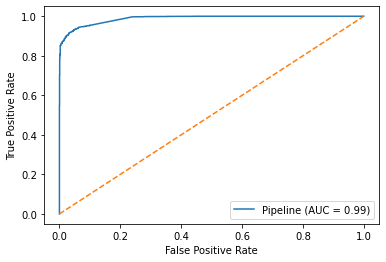

In [45]:
# plots the ROC curve and visualizes the AUC score
plot_roc_curve(pipe, X_test, y_test)
plt.plot([0,1],[0,1], label='baseline', linestyle='--');

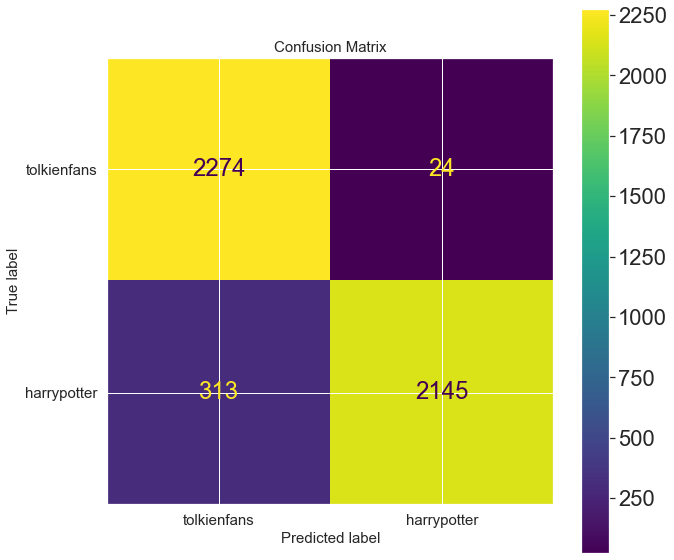

In [46]:
# Creates the confusion matrix and saves it as an image
sns.set(font_scale=2.0)
cm = confusion_matrix(y_test, y_preds)
fig, ax = plt.subplots(figsize=(10, 10))
plot = ConfusionMatrixDisplay(cm).plot(ax=ax)
plot
plt.title('Confusion Matrix')
ax.set_title('Confusion Matrix', fontdict={'size':'15'})
ax.set_xticklabels(df['subreddit'].unique(), size=15);
ax.set_yticklabels(df['subreddit'].unique(), size=15);
ax.set_xlabel('Predicted label', fontdict={'size':'15'})
ax.set_ylabel('True label', fontdict={'size':'15'})

plt.savefig('../../../presentation/imgs/cm_rf_countvect_stem.jpg')

In [47]:
dir(pipe.named_steps['rf'])

['__abstractmethods__',
 '__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_check_n_features',
 '_estimator_type',
 '_get_param_names',
 '_get_tags',
 '_make_estimator',
 '_more_tags',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_required_parameters',
 '_set_oob_score',
 '_validate_X_predict',
 '_validate_data',
 '_validate_estimator',
 '_validate_y_class_weight',
 'apply',
 'base_estimator',
 'base_estimator_',
 'bootstrap',
 'ccp_alpha',
 'class_weight',
 'classes_',
 'criterion',
 'decision_path',
 'estimator_params',
 'estimators_',
 'feature_

In [48]:
# Finds the feature importances from the pipeline
importances = pipe.named_steps['rf'].feature_importances_

In [49]:
importances

array([0., 0., 0., ..., 0., 0., 0.])

In [50]:
# Finds the features names from the pipeline
names = pipe.named_steps['cvec'].get_feature_names()

In [51]:
# Creates the feature importance dataframe
importance_dict = pd.DataFrame({'feature_importance': importances,
                                'features': names})
top10 = importance_dict.nlargest(10, columns=['feature_importance'])
top10

,feature_importance,features
1802,0.107658,tolkien
827,0.072386,harri
1524,0.051795,sauron
539,0.043548,earth
561,0.034543,elv
1488,0.034265,ring
1345,0.032785,potter
1126,0.028819,middl
863,0.028645,hobbit
1061,0.026634,lotr


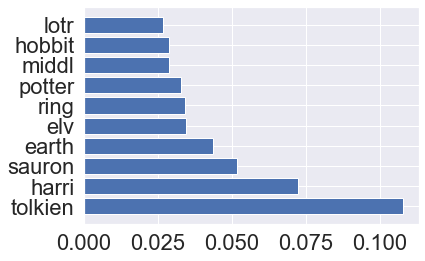

In [52]:
# Visualizes the feature importances
# sns.set(font_scale=1.0)
# plt.bar(x='features', height='feature_importances', data=top10);
plt.barh(top10['features'], top10['feature_importance']);
plt.savefig('../../../presentation/imgs/rf_countvect_stem_featureImp.jpg')